# Deep Learning Project

## Automatic Image Tagging for Fashion E-commerce  

Saman Zargarzadeh, Devy Yeap, Tiantian Gu, Tannaz Ebrahimi, Xia-Rong Zhang

### Explain the problem:

This dataset contains a large number of images and corresponding fashion/apparel segmentations.
For this step of project we made a dataset which has three columns:

“ImageId” - the unique ID of an image

“SetClassID” - the identified attributes ID’s of the image, such as “shirt, blouse”, “sweater”, etc

“Class” -  1 if identified attributes contain “dress”, else 0.

Thus the binary outcome variable is “Class” - if the identified attributes of the image contain “dress”, then it’s class 1; else class 0.

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
import os
import gc
import sys
import json
import random
from pathlib import Path
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('/Users/macbook/Desktop/Uni/Quarter 4/Deep Learning/Project/imaterialist-fashion-2020-fgvc7/train.csv')

In [7]:
with open('/Users/macbook/Desktop/Uni/Quarter 4/Deep Learning/Project/imaterialist-fashion-2020-fgvc7/label_descriptions.json', 'r') as file:
    label_desc = json.load(file)
sample_sub_df = pd.read_csv('/Users/macbook/Desktop/Uni/Quarter 4/Deep Learning/Project/imaterialist-fashion-2020-fgvc7/sample_submission.csv')


In [8]:
categories_df = pd.DataFrame(label_desc['categories'])
attributes_df = pd.DataFrame(label_desc['attributes'])
categories_df

,id,name,supercategory,level
0,0,"shirt, blouse",upperbody,2
1,1,"top, t-shirt, sweatshirt",upperbody,2
2,2,sweater,upperbody,2
3,3,cardigan,upperbody,2
4,4,jacket,upperbody,2
5,5,vest,upperbody,2
6,6,pants,lowerbody,2
7,7,shorts,lowerbody,2
8,8,skirt,lowerbody,2
9,9,coat,wholebody,2


In [9]:
df["Ratio"]=df["Height"]/df["Width"]
df.head()

,ImageId,EncodedPixels,Height,Width,ClassId,AttributesIds,Ratio
0,00000663ed1ff0c4e0132b9b9ac53f6e,6068157 7 6073371 20 6078584 34 6083797 48 608...,5214,3676,6,"115,136,143,154,230,295,316,317",1.41839
1,00000663ed1ff0c4e0132b9b9ac53f6e,6323163 11 6328356 32 6333549 53 6338742 75 63...,5214,3676,0,"115,136,142,146,225,295,316,317",1.41839
2,00000663ed1ff0c4e0132b9b9ac53f6e,8521389 10 8526585 30 8531789 42 8537002 46 85...,5214,3676,28,163,1.41839
3,00000663ed1ff0c4e0132b9b9ac53f6e,12903854 2 12909064 7 12914275 10 12919485 15 ...,5214,3676,31,"160,204",1.41839
4,00000663ed1ff0c4e0132b9b9ac53f6e,10837337 5 10842542 14 10847746 24 10852951 33...,5214,3676,32,219,1.41839


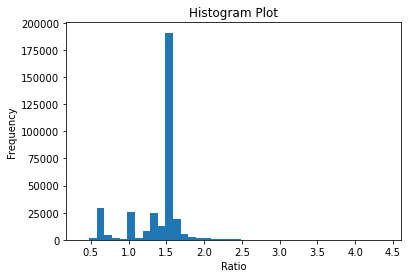

In [10]:
# create the histogram plot
plt.hist(df["Ratio"], bins=40)

# add labels and title
plt.xlabel('Ratio')
plt.ylabel('Frequency')
plt.title('Histogram Plot')

# show the plot
plt.show()

In [11]:
(df["Ratio"]).mean()

1.3736954977652924

In [12]:
(df["Ratio"]).mode()[0]

1.5

In [13]:
pd.DataFrame((df["Ratio"]).value_counts()).head()

,Ratio
1.500000,78784
1.000000,24422
1.499250,15896
1.333333,12550
0.666667,10521


In [14]:
ratio_df = df.groupby('ImageId')['Ratio'].mean().reset_index()
ratio_df.head()

,ImageId,Ratio
0,00000663ed1ff0c4e0132b9b9ac53f6e,1.418390
1,0000fe7c9191fba733c8a69cfaf962b7,1.000000
2,0002ec21ddb8477e98b2cbb87ea2e269,1.502253
3,0002f5a0ebc162ecfb73e2c91e3b8f62,1.417500
4,0004467156e47b0eb6de4aa6479cbd15,1.500000


In [15]:
image_df = df.groupby('ImageId')['AttributesIds', 'ClassId'].agg(lambda x: list(x))
image_df.reset_index(inplace=True)
image_df['ImageId'] = image_df['ImageId'].astype('str')

/var/folders/s5/4b25bvq14pqbm1qxsg0hhlr40000gn/T/ipykernel_91517/700136001.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  image_df = df.groupby('ImageId')['AttributesIds', 'ClassId'].agg(lambda x: list(x))


In [16]:
names = ["shirt, blouse","top, t-shirt, sweatshirt","sweater","cardigan",
"jacket","vest","pants","shorts","skirt","coat","dress","jumpsuit","cape",
"glasses","hat","headband, head covering, hair accessory","tie","glove",
"watch","belt","leg warmer","tights, stockings","sock","shoe","bag, wallet",
"scarf","umbrella","hood","collar","lapel","epaulette","sleeve","pocket","neckline",
"buckle","zipper","applique","bead","bow","flower","fringe","ribbon","rivet","ruffle",
"sequin","tassel"]

In [17]:
set_cls= []
for i in range(len(image_df)):
    classes = list(set(image_df['ClassId'].iloc[i]))
    set_cls.append(classes)
    
image_df['SetClassId'] = set_cls
image_df.drop(['AttributesIds','ClassId'],axis=1,inplace=True)

In [18]:
image_df=image_df.merge(ratio_df, on='ImageId')
image_df.head()

,ImageId,SetClassId,Ratio
0,00000663ed1ff0c4e0132b9b9ac53f6e,"[0, 32, 4, 6, 28, 29, 31]",1.418390
1,0000fe7c9191fba733c8a69cfaf962b7,"[33, 1]",1.000000
2,0002ec21ddb8477e98b2cbb87ea2e269,"[33, 10, 23]",1.502253
3,0002f5a0ebc162ecfb73e2c91e3b8f62,"[33, 10, 15]",1.417500
4,0004467156e47b0eb6de4aa6479cbd15,"[33, 10, 15, 31]",1.500000


In [19]:
image_df = image_df[image_df['Ratio'] == 1.5]
image_df.head()

,ImageId,SetClassId,Ratio
4,0004467156e47b0eb6de4aa6479cbd15,"[33, 10, 15, 31]",1.5
5,00048c3a2fb9c29340473c4cfc06424a,"[1, 33, 35, 8, 13, 23, 24]",1.5
12,000c9b4926cd78edd4c19cbc6beba111,"[33, 10]",1.5
13,000cd2e13d1bdd28f480304d7bb9e1ca,"[1, 35, 37, 7, 23, 28, 31]",1.5
15,000e18920575a2e59b3a0c38e6546d29,"[33, 36, 10, 15, 23]",1.5


In [20]:
image_df.shape

(9817, 3)

In [21]:
indices = []

# Loop through the rows of the DataFrame
for i in range(len(image_df)):
    if len(image_df.SetClassId.iloc[i]) == 1:
        indices.append(i)
print("Number of images that have only one class:")
print(len(indices))

Number of images that have only one class:
13


So only 13 images have only one class so we couldn't make the data binary with this strategy 

Our next idea would be making data binary by the tags of Dress

In [22]:
# Define the numbers to search for
search_numbers = [10]

# Create a boolean mask indicating which rows contain the specified numbers
mask = image_df['SetClassId'].apply(lambda x: any([num in x for num in search_numbers]))

# Filter the DataFrame based on the mask
filtered_df = image_df[mask]
other_df = image_df[~mask]


In [23]:
filtered_df.shape

(4113, 3)

In [24]:
other_df.shape

(5704, 3)

**************************************************


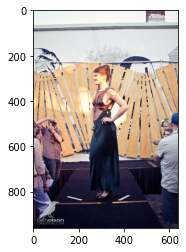

[0] neckline 
[1] dress 
[2] shoe 
**************************************************
**************************************************


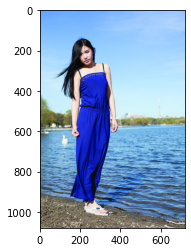

[0] neckline 
[1] dress 
[2] shoe 
**************************************************
**************************************************


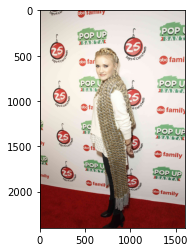

[0] sweater 
[1] pants 
[2] dress 
[3] watch 
[4] shoe 
[5] scarf 
[6] sleeve 
**************************************************
**************************************************


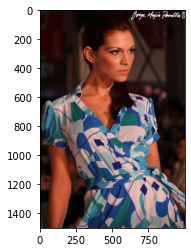

[0] dress 
[1] belt 
[2] collar 
[3] sleeve 
**************************************************
**************************************************


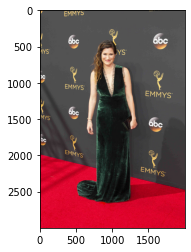

[0] bag, wallet 
[1] neckline 
[2] dress 
**************************************************


In [26]:
for i in range(5):
    x = np.random.randint(0,len(filtered_df),size=(1,))[0]
    ID = filtered_df['ImageId'].iloc[x]
    classes = filtered_df['SetClassId'].iloc[x]
    print('*'*50)
    plt.imshow(mpimg.imread(f'/Users/macbook/Desktop/Uni/Quarter 4/Deep Learning/Project/imaterialist-fashion-2020-fgvc7/train/{ID}.jpg'))
    plt.show()
    for j in range(len(classes)):
        print('[{}] {} '.format(j,names[classes[j]]))
    print('*'*50)
    

**************************************************


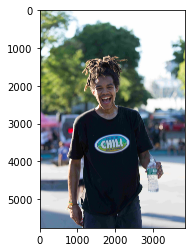

[0] top, t-shirt, sweatshirt 
[1] sleeve 
[2] neckline 
**************************************************
**************************************************


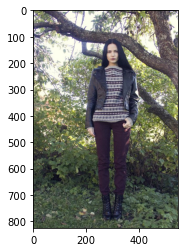

[0] neckline 
[1] sweater 
[2] zipper 
[3] jacket 
[4] pants 
[5] shoe 
[6] lapel 
[7] sleeve 
**************************************************
**************************************************


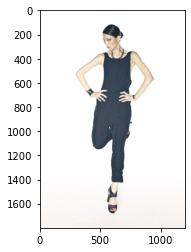

[0] neckline 
[1] jumpsuit 
[2] shoe 
**************************************************
**************************************************


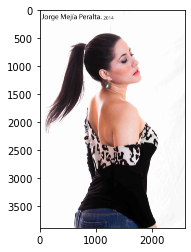

[0] top, t-shirt, sweatshirt 
[1] sleeve 
[2] neckline 
**************************************************
**************************************************


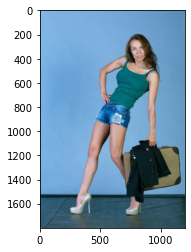

[0] pocket 
[1] top, t-shirt, sweatshirt 
[2] neckline 
[3] jacket 
[4] shorts 
[5] shoe 
[6] bag, wallet 
**************************************************


In [ ]:
for i in range(5):
    x = np.random.randint(0,len(other_df),size=(1,))[0]
    ID = other_df['ImageId'].iloc[x]
    classes = other_df['SetClassId'].iloc[x]
    print('*'*50)
    plt.imshow(mpimg.imread(f'/Users/macbook/Desktop/Uni/Quarter 4/Deep Learning/Project/imaterialist-fashion-2020-fgvc7/train/{ID}.jpg'))
    plt.show()
    for j in range(len(classes)):
        print('[{}] {} '.format(j,names[classes[j]]))
    print('*'*50)

# Adding Class Column

Dress = 1 and Non-Dress = 0

In [27]:
filtered_df["Class"]=1
other_df["Class"]=0

/var/folders/s5/4b25bvq14pqbm1qxsg0hhlr40000gn/T/ipykernel_91517/4009865848.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["Class"]=1
/var/folders/s5/4b25bvq14pqbm1qxsg0hhlr40000gn/T/ipykernel_91517/4009865848.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  other_df["Class"]=0


Choose a Sample of 8,000 row data

In [28]:
Sample_One=filtered_df.sample(n=4000, random_state=1)
Sample_Zero=other_df.sample(n=4000, random_state=1)

In [29]:
# Join the two DataFrames based on the 'ImageId' column
merged_df = pd.concat([Sample_One, Sample_Zero], sort=False)

# Print the merged DataFrame
merged_df

,ImageId,SetClassId,Ratio,Class
27728,9b01f757e9d3e3fc5e952777a96b4a89,"[33, 1, 10, 23, 31]",1.5,1
30430,aa5abdaffe018a1120b398c95b73421a,"[33, 10, 19]",1.5,1
40662,e4799cbf1636e0ba03ca83b6c6900376,"[33, 10, 23, 31]",1.5,1
6148,225817254a2f21bda925bdad41d98c10,"[33, 10, 15, 23, 31]",1.5,1
32577,b68ddc7f37b231502787fc8b1c02464c,"[1, 33, 10, 19, 28, 31]",1.5,1
...,...,...,...,...
37347,d1a26c080b2905f8349fcab2b8bae2d7,"[0, 6, 24, 28, 31]",1.5,0
18358,6735faf45054c79ad33b47ad53a629be,"[32, 0, 4, 6, 16, 18, 28, 29, 31]",1.5,0
43592,f5001c233ae05d4675e752b2d797f00a,"[32, 0, 4, 6, 16, 22, 23, 28, 29, 31]",1.5,0
37199,d0c14188313179dac499039ddc274bc1,"[33, 34, 35, 1, 8, 43, 19, 23]",1.5,0


In [30]:
from sklearn.model_selection import train_test_split

In [31]:
y_tc, y_test = train_test_split(merged_df, test_size=0.2, random_state=42)
y_train, y_cv = train_test_split(y_tc, test_size=0.25, random_state=42)

In [32]:
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
y_cv = y_cv.reset_index(drop=True)


In [33]:
h_num_px=63
w_num_px=int(h_num_px/1.5)

w_num_px

42

In [34]:
from PIL import Image
import numpy as np

# Initialize an empty array to hold the images
X_test = np.empty((0, h_num_px, w_num_px, 3), dtype=np.uint8)
Y_test = y_test.copy()
Drop_ID_test=[]


for ID in y_test["ImageId"]:
    try:
        # load image using PIL
        img = Image.open((f'/Users/macbook/Desktop/Uni/Quarter 4/Deep Learning/Project/imaterialist-fashion-2020-fgvc7/train/{ID}.jpg')).resize((w_num_px, h_num_px))
        # convert to numpy array
        img_array = np.asarray(img)
        array = np.expand_dims(img_array, axis=0)
        X_test = np.append(X_test, array, axis=0)
    except Exception as e:
        print(f"Error loading image {ID}: {e}")
        Drop_ID_test.append(ID)
        #Y_test.drop(Y_test[Y_test["ImageID"] == ID].index, inplace=True)


In [35]:
from PIL import Image
import numpy as np

# Initialize an empty array to hold the images
X_train = np.empty((0, h_num_px, w_num_px, 3), dtype=np.uint8)
Y_train = y_train.copy()
Drop_ID_train=[]

for ID in y_train["ImageId"]:
    try:
        # load image using PIL
        img = Image.open((f'/Users/macbook/Desktop/Uni/Quarter 4/Deep Learning/Project/imaterialist-fashion-2020-fgvc7/train/{ID}.jpg')).resize((w_num_px, h_num_px))
        # convert to numpy array
        img_array = np.asarray(img)
        array = np.expand_dims(img_array, axis=0)
        X_train = np.append(X_train, array, axis=0)
    except Exception as e:
        print(f"Error loading image {ID}: {e}")
        Drop_ID_train.append(ID)
        #y_train.drop(y_train[y_train['ImageID'] == ID].index, inplace=True)
        

Error loading image 4e11531bffbd53642119f548f31853dd: all the input arrays must have same number of dimensions, but the array at index 0 has 4 dimension(s) and the array at index 1 has 3 dimension(s)


In [36]:
from PIL import Image
import numpy as np

# Initialize an empty array to hold the images
X_cv = np.empty((0, h_num_px, w_num_px, 3), dtype=np.uint8)
Y_cv = y_cv.copy()
Drop_ID_cv=[]

for ID in y_cv["ImageId"]:
    try:
        # load image using PIL
        img = Image.open((f'/Users/macbook/Desktop/Uni/Quarter 4/Deep Learning/Project/imaterialist-fashion-2020-fgvc7/train/{ID}.jpg')).resize((w_num_px, h_num_px))
        # convert to numpy array
        img_array = np.asarray(img)
        array = np.expand_dims(img_array, axis=0)
        X_cv = np.append(X_cv, array, axis=0)
    except Exception as e:
        print(f"Error loading image {ID}: {e}")
        Drop_ID_cv.append(ID)
        #y_cv.drop(y_cv[y_cv['ImageID'] == ID].index, inplace=True)
        

In [37]:
for ID in Drop_ID_test:
    Y_test.drop(Y_test[Y_test["ImageId"] == ID].index, inplace=True)

for ID in Drop_ID_train:
    Y_train.drop(Y_train[Y_train['ImageId'] == ID].index, inplace=True)

for ID in Drop_ID_cv:
    Y_cv.drop(Y_cv[Y_cv['ImageId'] == ID].index, inplace=True)

train_set_y=np.array(Y_train["Class"])
test_set_y=np.array(Y_test["Class"])
cv_set_y=np.array(Y_cv["Class"])

In [38]:
print("train:",train_set_y.shape[0])
print("cv:", cv_set_y.shape[0])
print("test:",test_set_y.shape[0])

train: 4799
cv: 1600
test: 1600


In [39]:
train_set_x_flatten = X_train.reshape(X_train.shape[0], -1).T
test_set_x_flatten = X_test.reshape(X_test.shape[0], -1).T
cv_set_x_flatten = X_cv.reshape(X_cv.shape[0], -1).T

In [40]:
train_set_x = train_set_x_flatten/255.
test_set_x = test_set_x_flatten/255.
cv_set_x = cv_set_x_flatten/255.

Finding sample is random but as we want to have a fix data to work on here we upload the first sample that I saved before

In [41]:
import numpy as np

# load the text file into an array
train_set_x = np.load('/Users/macbook/Desktop/Uni/Quarter 4/Deep Learning/Project/Automatic-Image-Tagging-for-Fashion-E-commerce/train_set_x.npy')
test_set_x = np.load('/Users/macbook/Desktop/Uni/Quarter 4/Deep Learning/Project/Automatic-Image-Tagging-for-Fashion-E-commerce/test_set_x.npy')
cv_set_x = np.load('/Users/macbook/Desktop/Uni/Quarter 4/Deep Learning/Project/Automatic-Image-Tagging-for-Fashion-E-commerce/cv_set_x.npy')

train_set_y = np.load('/Users/macbook/Desktop/Uni/Quarter 4/Deep Learning/Project/Automatic-Image-Tagging-for-Fashion-E-commerce/train_set_y.npy')
test_set_y = np.load('/Users/macbook/Desktop/Uni/Quarter 4/Deep Learning/Project/Automatic-Image-Tagging-for-Fashion-E-commerce/test_set_y.npy')
cv_set_y = np.load('/Users/macbook/Desktop/Uni/Quarter 4/Deep Learning/Project/Automatic-Image-Tagging-for-Fashion-E-commerce/cv_set_y.npy')


# Logistic Regression Model

In [42]:
def initialize_with_zeros(dim):
    w = np.zeros((dim,1))
    b = 0
    
    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

In [43]:
def sigmoid(z):
    s = 1/(1+np.exp(-z))
    return s

In [44]:
def propagate(w, b, X, Y):

    m = X.shape[1]
    
    # FORWARD PROPAGATION (FROM X TO COST)
    A = sigmoid(np.dot(w.T,X)+b)                                    
    cost = (-1/m)*np.sum(Y*np.log(A)+(1-Y)*np.log(1-A))                                 
    
    
    # BACKWARD PROPAGATION (TO FIND GRAD)
    Dw = (1/m)*np.dot(X, (A-Y).T)
    Db = (1/m)*np.sum(A-Y)

    assert(Dw.shape == w.shape)
    assert(Db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"Dw": Dw,
             "Db": Db}
    
    return grads, cost

In [45]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    
    costs = []
    
    for i in range(num_iterations):
        grads, cost = propagate(w, b, X, Y)

        
        # Retrieve derivatives from grads
        Dw = grads["Dw"]
        Db = grads["Db"]
        
        # update rule 
        w = w - learning_rate *Dw
        b = b - learning_rate *Db
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"Dw": Dw,
             "Db": Db}
    
    return params, grads, costs

In [46]:
def predict(w, b, X):
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    A = sigmoid(np.dot(w.T,X)+b) 
        
    for i in range(A.shape[1]):  
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        if A[0,i] <= 0.5:
            Y_prediction[0,i]=0
        else:
            Y_prediction[0,i]=1
            
    
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

In [47]:
def model(X_train, Y_train, X_test, Y_test, X_cv, Y_cv, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    # initialize parameters with zeros 
    w, b = initialize_with_zeros(X_train.shape[0])

    # Gradient descent 
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost = False)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples 
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)
    Y_prediction_cv = predict(w, b, X_cv)


    
    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))
    print("cv accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_cv - Y_cv)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train,
         "Y_prediction_cv" : Y_prediction_cv,
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    # plot the cost

    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return d

train accuracy: 61.30443842467181 %
test accuracy: 59.9375 %
cv accuracy: 61.9375 %


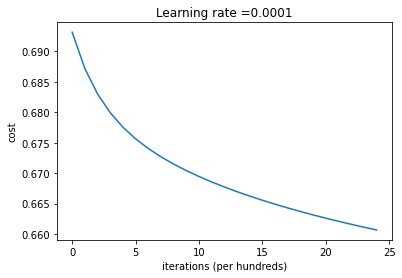

In [48]:
d = model(train_set_x, train_set_y, 
          test_set_x, test_set_y, 
          cv_set_x, cv_set_y,
          num_iterations = 2500, 
          learning_rate = 0.0001, print_cost = True)


# Shallow NN

In [49]:
def layer_sizes(X, Y):
    
    n_x = X.shape[0] # size of input layer
    n_h = 4
    n_y = Y.shape[0] # size of output layer
    
    return (n_x, n_h, n_y)

In [50]:
(n_x, n_h, n_y) = layer_sizes(train_set_x, train_set_y)
print("The size of the input layer is: n_x = " + str(n_x))
print("The size of the hidden layer is: n_h = " + str(n_h))
print("The size of the output layer is: n_y = " + str(n_y))

The size of the input layer is: n_x = 7938
The size of the hidden layer is: n_h = 4
The size of the output layer is: n_y = 4799


In [51]:
n_x = train_set_x.shape[0] # size of input layer
n_h = 4
n_y = train_set_y.shape[0] # size of output layer

In [52]:
def initialize_parameters(n_x, n_h, n_y):

    np.random.seed(1)
    
    W1 = np.random.randn(n_h,n_x)*0.01
    b1 = np.zeros((n_h,1))
    W2 = np.random.randn(n_y,n_h)*0.01
    b2 = np.zeros((n_y,1))

    
    assert(W1.shape == (n_h, n_x))
    assert(b1.shape == (n_h, 1))
    assert(W2.shape == (n_y, n_h))
    assert(b2.shape == (n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters    

In [53]:
def initialize_parameters_deep(layer_dims):
    
    np.random.seed(3)
    parameters = {}
    L = len(layer_dims)            # number of layers in the network

    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) * 0.01
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))

        
        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))

        
    return parameters


In [54]:
def linear_forward(A, W, b):
    
    Z = np.dot(W,A)+b
    
    assert(Z.shape == (W.shape[0], A.shape[1]))
    cache = (A, W, b)
    
    return Z, cache


In [55]:
def relu(Z):
    A = np.maximum(0, Z)
    cache = Z
    return A, cache


In [56]:
def sigmoid(Z):
    A = 1 / (1 + np.exp(-Z))
    cache = Z
    return A, cache


In [57]:
def linear_activation_forward(A_prev, W, b, activation):
    
    if activation == "sigmoid":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = sigmoid(Z)
    
    elif activation == "relu":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = relu(Z)
    
    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    cache = (linear_cache, activation_cache)

    return A, cache

In [58]:
def L_model_forward(X, parameters):

    caches = []
    A = X
    L = len(parameters) // 2                  # number of layers in the neural network
    
    # Implement [LINEAR -> RELU]*(L-1). 
    for l in range(1, L):
        A_prev = A 
        A, cache = linear_activation_forward(A_prev, parameters['W' + str(l)], parameters['b' + str(l)], activation = "relu")
        caches.append(cache)                  # Add "cache" to the "caches" list
    
    # Implement LINEAR -> SIGMOID. 
    AL, cache = linear_activation_forward(A, parameters['W' + str(L)], parameters['b' + str(L)], activation = "sigmoid")
    caches.append(cache)                      # Add "cache" to the "caches" list
    
    assert(AL.shape == (1,X.shape[1]))
            
    return AL, caches


In [59]:
def compute_cost(AL, Y):
    
    Y = Y.reshape(1, -1) # reshape Y to be a row vector

    m = Y.shape[1]

    # Compute loss from aL and y.
    cost = -(1/m)*np.sum(Y*np.log(AL)+(1-Y)*np.log(1-AL))
    
    cost = np.squeeze(cost)      # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).
    assert(cost.shape == ())
    
    return cost

In [60]:
def sigmoid_backward(dA, activation_cache):
    Z = activation_cache
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)
    return dZ


In [61]:
def relu_backward(dA, activation_cache):
    Z = activation_cache
    dZ = np.array(dA, copy=True) # Convert dz to a correct object
    dZ[Z <= 0] = 0 # When z <= 0, set dz to 0 as well. 
    return dZ


In [62]:
def linear_backward(dZ, cache):

    A_prev, W, b = cache
    m = A_prev.shape[1]

    dA_prev = np.dot(W.T,dZ)
    dW = (1/m)*np.dot(dZ,A_prev.T)
    db = (1/m)*np.sum(dZ,axis=1,keepdims=True)
    
    
    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)
    
    return dA_prev, dW, db

In [63]:
def linear_activation_backward(dA, cache, activation):

    linear_cache, activation_cache = cache
    
    if activation == "relu":
        dZ = relu_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
        
    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
    
    return dA_prev, dW, db

In [64]:
def L_model_backward(AL, Y, caches):
    
    grads = {}
    L = len(caches) # the number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL
    
    # Initializing the backpropagation
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    
    # Lth layer (SIGMOID -> LINEAR) gradients. Inputs: "dAL, current_cache". Outputs: "grads["dAL-1"], grads["dWL"], grads["dbL"]
    current_cache = caches[L-1]
    grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL,current_cache, "sigmoid")

    
    # Loop from l=L-2 to l=0
    for l in reversed(range(L-1)):
        # lth layer: (RELU -> LINEAR) gradients.
        # Inputs: "grads["dA" + str(l + 1)], current_cache". Outputs: "grads["dA" + str(l)] , grads["dW" + str(l + 1)] , grads["db" + str(l + 1)] 
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l + 1)], current_cache, activation="relu")
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] =dW_temp
        grads["db" + str(l + 1)] = db_temp

    return grads

In [65]:
def update_parameters(parameters, grads, learning_rate):
    
    L = len(parameters) // 2 # number of layers in the neural network

    # Update rule for each parameter. Use a for loop.
    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)]-learning_rate*grads["dW" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)]-learning_rate*grads["db" + str(l+1)]

    return parameters

In [66]:
layers_dims = (n_x, n_h, n_y)
layers_dims

(7938, 4, 4799)

In [67]:
def two_layer_model(X, Y, layers_dims, learning_rate = 0.1, num_iterations = 3000, print_cost=False):
    
    np.random.seed(1)
    grads = {}
    costs = []                              # to keep track of the cost
    m = X.shape[1]                           # number of examples
    (n_x, n_h, n_y) = layers_dims
    
    # Initialize parameters dictionary, by calling one of the functions you'd previously implemented
    parameters = initialize_parameters(n_x, n_h, n_y)
    
    # Get W1, b1, W2 and b2 from the dictionary parameters.
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: LINEAR -> RELU -> LINEAR -> SIGMOID. Inputs: "X, W1, b1, W2, b2". Output: "A1, cache1, A2, cache2".
        A1, cache1 = linear_activation_forward(X, W1, b1, activation="relu")
        A2, cache2 = linear_activation_forward(A1, W2, b2, activation="sigmoid")
        
        # Compute cost
        cost = compute_cost(A2, Y)
        
        # Initializing backward propagation
        dA2 = - (np.divide(Y, A2) - np.divide(1 - Y, 1 - A2))
        
        # Backward propagation. Inputs: "dA2, cache2, cache1". Outputs: "dA1, dW2, db2; also dA0 (not used), dW1, db1".
        dA1, dW2, db2 = linear_activation_backward(dA2, cache2, activation="sigmoid")
        dA0, dW1, db1 = linear_activation_backward(dA1, cache1, activation="relu")
        
        # Set grads['dWl'] to dW1, grads['db1'] to db1, grads['dW2'] to dW2, grads['db2'] to db2
        grads['dW1'] = dW1
        grads['db1'] = db1
        grads['dW2'] = dW2
        grads['db2'] = db2
        
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)

        # Retrieve W1, b1, W2, b2 from parameters
        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]
        
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if print_cost and i % 100 == 0:
            costs.append(cost)
       
    # plot the cost

    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

Two layer as an example 

In [68]:
#parameters = two_layer_model(train_set_x, train_set_y, layers_dims = (n_x, n_h, n_y), learning_rate = 0.05,num_iterations = 2500, print_cost=True)

In [69]:
#def predict(parameters, X):

    #A1, cache1 = linear_activation_forward(X, parameters["W1"], parameters["b1"], activation="relu")
    #A2, cache2 = linear_activation_forward(A1, parameters["W2"], parameters["b2"], activation="sigmoid")
    #predictions = np.where(A2 > 0.5, 1, 0)
    
    #return predictions

In [70]:
#predict(parameters, train_set_x)

In [71]:
#predictions = predict(parameters, train_set_x)
#accuracy = float((np.dot(train_set_y,predictions.T) + np.dot(1-train_set_y,1-predictions.T))/float(train_set_y.size)*100)
#accuracy


# L Layer Function

In [73]:
from dnn_app_utils_v3 import *

In [74]:
def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):#lr was 0.009

    np.random.seed(1)
    costs = []                         # keep track of cost
    
    # Parameters initialization. (≈ 1 line of code)
    parameters = initialize_parameters_deep(layers_dims)
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        AL, caches = L_model_forward(X, parameters)
        
        # Compute cost.
        cost = compute_cost(AL, Y)
    
        # Backward propagation.
        grads = L_model_backward(AL, Y, caches)
 
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)
                
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

In [75]:
def predict(parameters, X):

    AL, caches = L_model_forward(X, parameters)
    predictions = np.where(AL > 0.5, 1, 0)
    
    return predictions

# Two Layer with 7 Unit and 4 Unit

In [76]:
layers_dims = [n_x, 7, 4, 1] #  4-layer model

Cost after iteration 0: 0.698325
Cost after iteration 100: 0.668278
Cost after iteration 200: 0.656720
Cost after iteration 300: 0.648907
Cost after iteration 400: 0.642308
Cost after iteration 500: 0.636270
Cost after iteration 600: 0.630655
Cost after iteration 700: 0.626262
Cost after iteration 800: 0.627104
Cost after iteration 900: 0.627410
Cost after iteration 1000: 0.625472
Cost after iteration 1100: 0.621088
Cost after iteration 1200: 0.623151
Cost after iteration 1300: 0.616624
Cost after iteration 1400: 0.613860
Cost after iteration 1500: 0.609218
Cost after iteration 1600: 0.609547
Cost after iteration 1700: 0.603064
Cost after iteration 1800: 0.603689
Cost after iteration 1900: 0.602882
Cost after iteration 2000: 0.601737
Cost after iteration 2100: 0.597233
Cost after iteration 2200: 0.594200
Cost after iteration 2300: 0.594070
Cost after iteration 2400: 0.591775


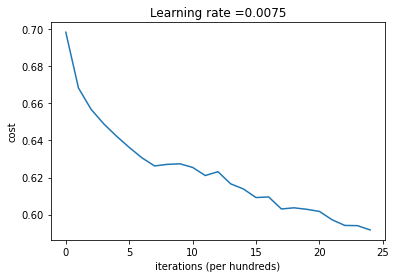

In [78]:
parameters = L_layer_model(train_set_x, train_set_y.reshape(1, -1), 
                           layers_dims, num_iterations = 2500, print_cost = True)

In [79]:
predictions = predict(parameters, train_set_x)
accuracy_train = float((np.dot(train_set_y,predictions.T) + 
                        np.dot(1-train_set_y,1-predictions.T))/float(train_set_y.size)*100)
print("Train Set:", round(accuracy_train,2),"%")

predictions = predict(parameters, test_set_x)
accuracy_test = float((np.dot(test_set_y,predictions.T) + 
                       np.dot(1-test_set_y,1-predictions.T))/float(test_set_y.size)*100)
print("Test Set:", round(accuracy_test,2),"%")

predictions = predict(parameters, cv_set_x)
accuracy_cv = float((np.dot(cv_set_y,predictions.T) + 
                     np.dot(1-cv_set_y,1-predictions.T))/float(cv_set_y.size)*100)
print("CV Set:", round(accuracy_cv,2),"%")


Train Set: 69.06 %
Test Set: 62.25 %
CV Set: 63.12 %


# One Hidden with L Layer Function

In [80]:
layers_dims = [n_x, 4, 1] 

Cost after iteration 0: 0.716012
Cost after iteration 100: 0.658549
Cost after iteration 200: 0.650482
Cost after iteration 300: 0.645668
Cost after iteration 400: 0.641261
Cost after iteration 500: 0.637372
Cost after iteration 600: 0.634789
Cost after iteration 700: 0.632028
Cost after iteration 800: 0.629096
Cost after iteration 900: 0.626901
Cost after iteration 1000: 0.624844
Cost after iteration 1100: 0.623676
Cost after iteration 1200: 0.621418
Cost after iteration 1300: 0.618247
Cost after iteration 1400: 0.613429
Cost after iteration 1500: 0.609896
Cost after iteration 1600: 0.610098
Cost after iteration 1700: 0.608490
Cost after iteration 1800: 0.606013
Cost after iteration 1900: 0.604705
Cost after iteration 2000: 0.602349
Cost after iteration 2100: 0.600284
Cost after iteration 2200: 0.598840
Cost after iteration 2300: 0.597271
Cost after iteration 2400: 0.594980


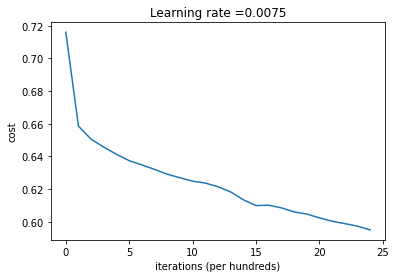

In [81]:
parameters = L_layer_model(train_set_x, train_set_y.reshape(1, -1), 
                           layers_dims, num_iterations = 2500, print_cost = True)

In [82]:
predictions = predict(parameters, train_set_x)
accuracy_train = float((np.dot(train_set_y,predictions.T) + 
                        np.dot(1-train_set_y,1-predictions.T))/float(train_set_y.size)*100)
print("Train Set:", round(accuracy_train,2),"%")

predictions = predict(parameters, test_set_x)
accuracy_test = float((np.dot(test_set_y,predictions.T) + 
                       np.dot(1-test_set_y,1-predictions.T))/float(test_set_y.size)*100)
print("Test Set:", round(accuracy_test,2),"%")

predictions = predict(parameters, cv_set_x)
accuracy_cv = float((np.dot(cv_set_y,predictions.T) + 
                     np.dot(1-cv_set_y,1-predictions.T))/float(cv_set_y.size)*100)
print("CV Set:", round(accuracy_cv,2),"%")


Train Set: 68.2 %
Test Set: 62.12 %
CV Set: 62.25 %
